<a href="https://colab.research.google.com/github/faislayy/CNN-Fashion-Image-Analysis/blob/main/mnist_fashion_in_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np

In [3]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [4]:
(X_train,Y_train), (X_test, Y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


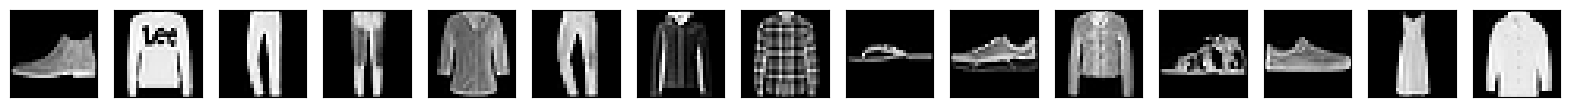

In [5]:
import matplotlib.pyplot as plt

n = 15

plt.figure(figsize=(20,5))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(X_test[i].reshape(28,28))

    plt.gray()

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
plt.close()

In [6]:
print("X_train: {}".format(X_train.shape))
print("X_test: {}".format(X_test.shape))
print("Y_train: {}".format(Y_train.shape))
print("Y_test: {}".format(Y_test.shape))

X_train: (60000, 28, 28)
X_test: (10000, 28, 28)
Y_train: (60000,)
Y_test: (10000,)


In [7]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [8]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

X_train /= 255
X_test /= 255

In [9]:
Y_train = to_categorical(Y_train, num_classes=15)
Y_test = to_categorical(Y_test, num_classes=15)

In [10]:
print("X_train: {}".format(X_train.shape))
print("X_test: {}".format(X_test.shape))
print("Y_train: {}".format(Y_train.shape))
print("Y_test: {}".format(Y_test.shape))

X_train: (60000, 28, 28, 1)
X_test: (10000, 28, 28, 1)
Y_train: (60000, 15)
Y_test: (10000, 15)


In [11]:
img_rows, img_cols, channels = 28, 28, 1

classes = 15

filters = [6, 32, 80, 120]

In [12]:
model = Sequential()

model.add(Conv2D(filters[0],(3,3), padding="same", activation="relu", input_shape=(img_rows, img_cols, channels)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters[1],(2,2), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters[2],(2,2), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters[3],(2,2), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64, activation="relu"))
model.add(Dense(classes, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         60        
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 6)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        800       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 80)          10320     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 80)          0

In [13]:
from time import time

tic = time()

model.fit(X_train, Y_train, epochs=15, batch_size=128, verbose=1)

toc = time()

print("Timr taken to train the model is {} sec.".format(toc-tic))

Epoch 1/15
469/469 [==============================] - 13s 5ms/step - loss: 2.0051 - accuracy: 0.2933
Epoch 2/15
469/469 [==============================] - 2s 4ms/step - loss: 0.9716 - accuracy: 0.6183
Epoch 3/15
469/469 [==============================] - 2s 4ms/step - loss: 0.7949 - accuracy: 0.6959
Epoch 4/15
469/469 [==============================] - 2s 5ms/step - loss: 0.7053 - accuracy: 0.7323
Epoch 5/15
469/469 [==============================] - 3s 6ms/step - loss: 0.6472 - accuracy: 0.7573
Epoch 6/15
469/469 [==============================] - 2s 4ms/step - loss: 0.5991 - accuracy: 0.7767
Epoch 7/15
469/469 [==============================] - 2s 4ms/step - loss: 0.5657 - accuracy: 0.7909
Epoch 8/15
469/469 [==============================] - 2s 4ms/step - loss: 0.5365 - accuracy: 0.8036
Epoch 9/15
469/469 [==============================] - 2s 4ms/step - loss: 0.5131 - accuracy: 0.8117
Epoch 10/15
469/469 [==============================] - 2s 5ms/step - loss: 0.4949 - accuracy: 0.817

In [14]:
from sklearn.metrics import accuracy_score

pre = model.predict(X_test)
pred = np.where(pre>0.5,1,0)

accuracy = accuracy_score(pred, Y_test)
print("The accuracy of the model is {}".format(accuracy))

313/313 [==============================] - 1s 3ms/step
The accuracy of the model is 0.7926


In [15]:
mask = range(20,60)

X_valid = X_test[20:40]

predd = model.predict(X_valid)
prediction = np.where(predd>0.5,1,0)

1/1 [==============================] - 0s 115ms/step


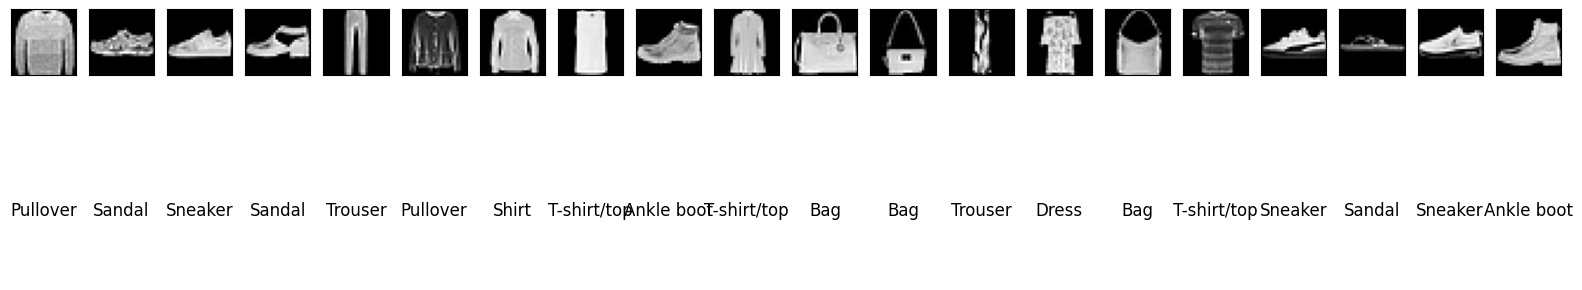

In [16]:
n = len(X_valid)

names = [
     "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

plt.figure(figsize=(20,4))

for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(X_valid[i].reshape(28,28))

    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    digit= np.argmax(prediction[i])
    img_digit = names[digit]

    plt.subplot(2,n,i+n+1)
    plt.text(0.5,0.5, img_digit, fontsize=12, ha="center", va="center")
    plt.axis("off")

plt.show()
plt.close()